In [1]:
%%HTML
<!-- Make fonts readable at 1024x768 -->
<style>
.rendered_html { font-size:0.7em; }
</style>

In [1]:
import numpy as np
import scipy.signal
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib import animation, patches
from IPython.display import display, Audio, HTML
import soundfile as sf
from style import *

### Universidad Austral de Chile 
## INFO185 Comunicaciones


# Unidad 2 - Introducción a los sistemas de comunicaciones

### Dr. Pablo Huijse, phuijse at inf dot uach dot cl 

### <a href="https://github.com/phuijse/UACH-INFO185"> github.com/phuijse/UACH-INFO185 </a>


# Sistemas de comunicación digitales

Los sistemas y tecnologías de comunicación digital han tenido un crecimiento exponencial en las últimas decadas y podemos encontrarlos en múltiples aspectos de nuestra vida diaria. 

Hoy en día gran parte de los sistemas de comunicacion están basados en la transmisión de señales eléctricas

<center><img src="images/standards.png"></center>

## Modelo de Shannon

El modelo de Shannon define los elementos básicos de un sistema de comunicación

Fuente -(mensaje)- Transmisor - (señal+ruido) - Canal - (señal) - Receptor - (mensaje) - Destino

- <span style="color:blue">Mensaje</span>: Es la información que deseamos enviar y recibir
- <span style="color:blue">Transmisor</span>: Convierte el mensaje a impulsos eléctricos usando un sensor/transductor, luego lo **transforma** y transmite. 
- El objetivo de la transformación es hacer la transmisión lo más eficiente posible.
- <span style="color:blue">Señal</span>: Es el mensaje convertido por el transmisor tal que puede viajar por el canal hacia el receptor
- <span style="color:blue">Canal</span>: Es el medio por el cual se envian las señales eléctricas del transmisor hacia el receptor
- <span style="color:blue">Receptor</span>: Captura la señal del transmisor, aplica las **transformaciones inversas** y lo convierte a su forma original por medio de un actuador/transductor

- El canal actua como un atenuador de la señal. En general la atenuación es mayor mientras más "largo" sea el canal. Ciertas distorciones pueden ser corregidas por el receptor usando ecualización
- El **ruido** es una corrupción o interferencia indeseable que modifica la señal cuando esta pasa por el canal. El ruido es por lo general aleatorio, puede reducirse para nunca eliminarse por completo.
- El **ruido** es en muchos casos quien pone los límites en los sistemas de comunicación

Ejemplo walkie-talkie: idea, voz, microfono, señal de audio, modulación FM, aire, demodulación, parlante, oido

<img src="images/walkietalkie.jpg">

### ¿Qué es una señal?
- Es una **función** de una o más variables que provee información (mensaje) sobre un fenómeno físico
    - Ejemplos de variable independiente: tiempo (1d), superficie (2d), volumen (3d)
    - Ejemplos de variable dependiente: potencial eléctrico, presión en el aire (sonido), imágenes
- Cuando una de las variables independientes es el tiempo hablamos de **serie de tiempo**






<table><tr><td> 
    <img src="images/stock_market.png" width="400">  
    </td><td> 
    <img src="images/transit.gif" width="400">
    </td></tr><tr><td>
    <img src="images/scalp.gif" width="400">  
    </td><td> 
    <img src="images/fmri.jpg" width="400">  
</td></tr></table>



### Carácterísticas de una señal 
- Sea una señal definida como una función g(t) donde t es el tiempo
- Duración $T$, tal que $g(t) = 0 ~~ \forall t > T$ 
- Energía (norma de la señal) $$E_g = ||g|| = \int_{-\infty}^{\infty} | g(t) |^2 dt $$
la energía es una medida del tamañó/área de la señal
<center><img src="images/sigsize1.png"></center>
- Potencia: Energía por unidad de tiempo
$$
P_g = \lim_{t\to\infty} \frac{1}{T} \int_{-T/2}^{T/2} |g(t)|^2 dt 
$$
que se mide usualmente en $10 \log_{10}(P) [dBm]$
- La potencia mide la fuerza o intensidad de la señal
- **Razón señal a ruido (SNR)**: Corresponde a la potencia de la señal dividido por la potencia del ruido. Es una medida de la calidad de la señal

### Clasificación de señales

Algunos tipos de señales:
- Señal de tiempo continuo o de tiempo discreto
- Señal analógica o digital
- Señal periódica o aperiódica
- Señal determinística o estocástica

<table><tr><td> 
    <img src="images/signal2.png" width="400">  
    </td><td> 
    <img src="images/signal.png" width="450">
</td></tr></table>



- Los señales "naturales" son en general analógicas de tiempo continuo
- Los sistemas de comunicación digitales se basan en pulsos eléctricos de tiempo discreto
- Una señal analógica puede digitalizarse muestreando en el tiempo (reloj) y cuantizando en su magnitud
- Hoy en día las tecnologías digitales han reemplazando a las análogicas. Esto se debe a que la comunicación digital es más resistente al ruido y a las distorsiones (Lathi & Ding, 2009, Sec 1.2)


In [ ]:
x = np.linspace(0.0, 5.0, num=1000)
y = np.sin(2.0*np.pi*1.0*x)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(x, y, linewidth=2)
ax[1].plot(x, np.floor(y//0.25))
ax[2].stem(x[::20], np.floor(y[::20]//0.25));

Extras:
- Señal estacionaria
- Señal ergódica
- Sensores y Conversor A/D D/A
- Teorema del muestreo

- Una señal **determinística** es aquella que puede describirse completamente por una ecuación matemática, *e.g.* $y = \cos(2\pi f t)$
- Una señal **estocástica** es aquella que sólo puede ser descrita probabilisticamente, es decir en términos de su densidad de probabilidad, *e.g.* $ z \sim \mathcal{N}(\mu, \Sigma)$

In [ ]:
x = np.linspace(0.0, 5.0, num=1000)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x, np.sin(2.0*np.pi*1.0*x), linewidth=2)
ax[1].plot(x, np.random.randn(len(x)));

- Una señal periódica es aquella que se repite luego de un cierto tiempo P. Este tiempo se denomina periodo
- Una señal aperiódica es aquella que no se repite regularmente en el tiempo.

In [ ]:
x = np.linspace(0.0, 5.0, num=1000)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x, np.sin(2.0*np.pi*1.0*x)*np.sin(2.0*np.pi*0.5*x) + 0.1*np.random.randn(len(x)), linewidth=2)
ax[1].plot(x, x + np.random.randn(len(x)));

# Análisis de señales unidimensionales

## Contenidos:

- Covarianza, correlación y convolución
- Serie de Fourier
- Transformada de Fourier discreta
- Transformada rápida de Fourier

### Notación

- Función de tiempo continuo: $g(t)$
- Función de tiempo discreto: $g[n] = g(t_n)$ con $t_n = n T_s, n\in [0, N]$
- Tiempo o intervalo de muestreo: $T_s$


<img src="images/sampledsignal.png" width="600">


## Comparando señales: covarianza y correlación cruzada

Podemos analizar la similitud entre dos señales $g()$ y $f()$ en función de un retardo $\tau$ usando el la covarianza cruzada

$$ \text{COV}_{gf}(\tau) = \mathbb{E}[(g(t)-\mu_g)(f(t + \tau)-\mu_f)], $$

y para procesos discretos con retardo $m$:
$$ \text{COV}_{gf}[m] = \frac{1}{N} \sum_{n=1}^N (g[n] - \bar g)(f[n+m] - \bar f), $$

donde la media de la señal se estima como $ \bar g = \frac{1}{N} \sum_{n=1}^N g[n]$.

Si las señales tienen distinta escala es conveniente usar la correlación cruzada

$$ \rho_{gf}[m] = \frac{\text{COV}_{gf}[m]}{\hat \sigma_g \hat \sigma_f}, $$
donde la desviación estándar de la señal se estima como $\hat \sigma_g = \frac{1}{N} \sqrt{\sum_{n=1}^N (g[n] - \bar g)^2}$

También es de interés comparar una señal consigo misma usando la autocorrelación cruzada
$$ \rho_{gg}[m] = \frac{\text{COV}_{gg}[m]}{\hat \sigma_g^2}= \frac{1}{(N-m) \hat \sigma_g^2} \sum_{n=1}^{N-m} (g[n] - \bar g)(g[n+m] - \bar g), $$

<IPython.core.display.Javascript object>


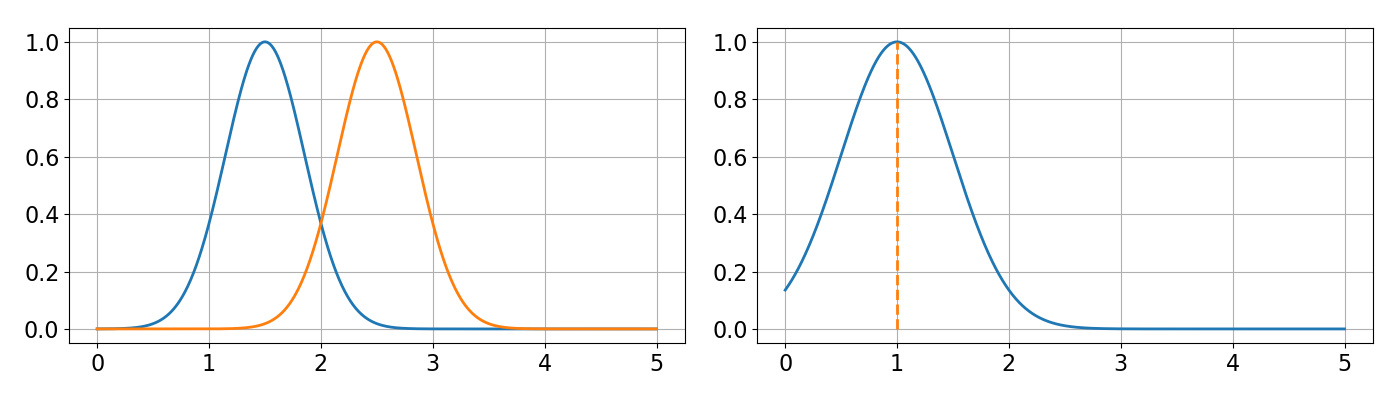

In [3]:
# Ejemplo: Correlación entre dos señales para encontrar su desface
x = np.linspace(0.0, 5.0, num=1000)
y1 = (np.exp(-4.0*(x-1.5)**2)); y2 = (np.exp(-4.0*(x-2.5)**2))
vary1 = np.mean(y1**2); vary2 = np.mean(y2**2);
crosscorr = np.zeros(shape=(1000,))
crosscorr[0] = np.sum(y1*y2)/1000
for m in range(len(crosscorr)-1):
    crosscorr[m+1] = np.sum(y1[:-m-1]*y2[m+1:])/1000

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(x, y1, linewidth=2)
ax[0].plot(x, y2, linewidth=2)
ax[1].plot(x, crosscorr/np.sqrt(vary1*vary2), linewidth=2);
ax[1].plot([x[np.argmax(crosscorr)], x[np.argmax(crosscorr)]], 
           [0, 1], linewidth=2, linestyle='--');

<IPython.core.display.Javascript object>


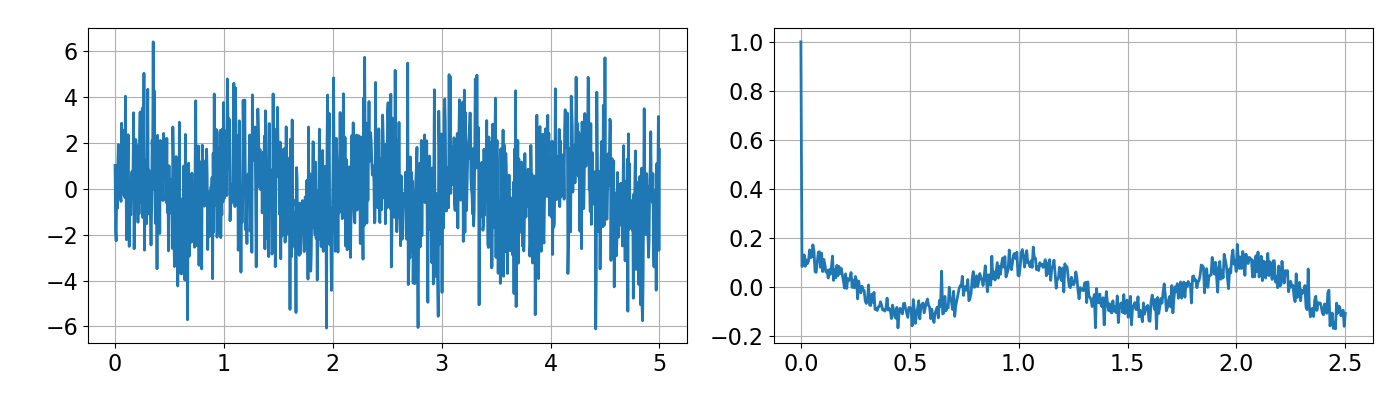

In [4]:
# Ejemplo: El periódo de la señal corresponde al segundo máximo de la autocorrelación
x = np.linspace(0.0, 5.0, num=1000)
y = np.sin(2.0*np.pi*1.0*x) + 2.0*np.random.randn(len(x))
vary = np.mean(y**2)
autocorr = np.zeros(shape=(500,))
autocorr[0] = np.mean(y**2)
for m in range(499):
    autocorr[m+1] = np.mean(y[m+1:]*y[:-m-1])

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(x, y, linewidth=2)
ax[1].plot(np.linspace(0, 2.5, 500), autocorr/vary, linewidth=2);

### Convolución

La operación de producto punto entre versiones desplazadas de funciones se llama convolución y se denota con $*$

$$
(f*g) (\tau) = \int g(t) f(\tau - t) \,dt = \int f(t) g(\tau - t) \,dt
$$
La convolución discreta se define como
$$
(f*g)[m] = \sum_n f[n] g[n-m]
$$
las funciónes de covarianza y correlación se pueden escribir como convoluciones

<IPython.core.display.Javascript object>


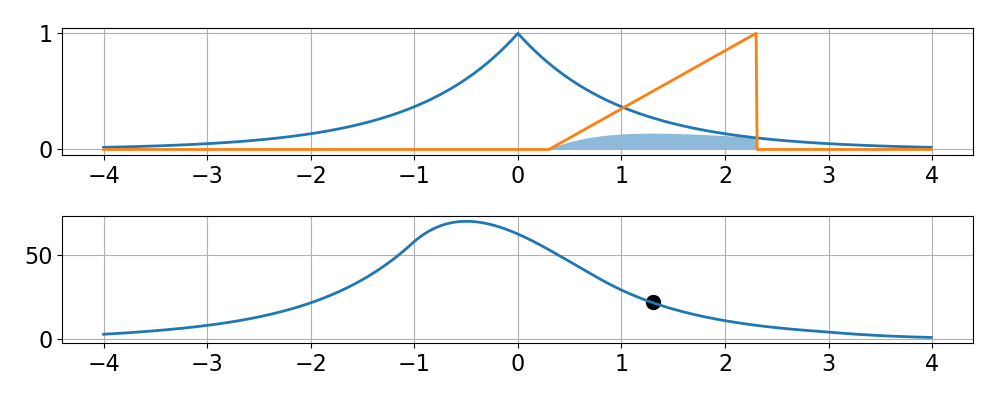

In [5]:
plt.close('all'); fig, ax = plt.subplots(2, figsize=(10, 4))
t = np.arange(-4, 4, step=1e-2)

def square_pulse(t, a=0, T=1):
    s = np.zeros(shape=t.shape)
    s[np.absolute(t-a)<T] = 0.5 + 0.5*(t[np.absolute(t-a)<T]-a)/T 
    return s
lap_pulse = lambda t, a=0, s=1 : np.exp(-np.absolute(t-a)/s)
conv_s = np.convolve(square_pulse(t), lap_pulse(t), mode='same')

def update(a = 0): 
    ax[0].cla(); ax[1].cla()
    p1, p2 = square_pulse(t, 0.1*a - 4), lap_pulse(t)
    ax[0].plot(t, p2); ax[0].plot(t, p1); 
    ax[0].fill_between(t, 0, p1*p2, alpha=0.5)
    ax[1].plot(t, conv_s[::-1]); ax[1].scatter(0.1*a -4, np.sum(p1*p2), s=100, c='k')
    
anim = animation.FuncAnimation(fig, update, frames=80, interval=100, blit=True)

## Serie de Fourier

- La serie o descomposición de Fourier puede usarse para representar y aproximar una **señal periódica** en función de una base trigonométrica ortogonal. Para una señal $g(t)$, que cumple $g(t) = g(t+P) ~ \forall t$, es decir su período es P y su frecuencia fundamental es $f_0 = 1/P$ se tiene

$$
g(t) = a_0 + \sum_{k=1}^{M} a_m \cos(2\pi k f_0  t) + b_m \sin(2\pi k f_0  t),
$$
donde los coeficientes
$$
a_k = 2 f_0 \int_{0}^{P} g(t) \cos(2\pi k f_0  t) \qquad b_k = 2f_0 \int_{0}^{P} g(t) \sin(2\pi k f_0  t)
$$

- $f_0$ es la frecuencia fundamental y $k f_0$ es el m-esimo harmónico
- Las expresiones de los coeficientes $a_k$ y $b_k$ se específicas de la base de senos y cosenos. 
- Otras bases ortogonales resulten en coeficientes distintos, e.g. la serie de Fourier exponencial (Lathi & Ding, 2009, Sec. 2.9)

### Serie de Fourier de un tren de pulsos cuadrádos
- Se hacen 2*M sumas de N multiplicaciones
- Medimos la calidad de la aproximación en términos del Mean Square Error (MSE)

<IPython.core.display.Javascript object>


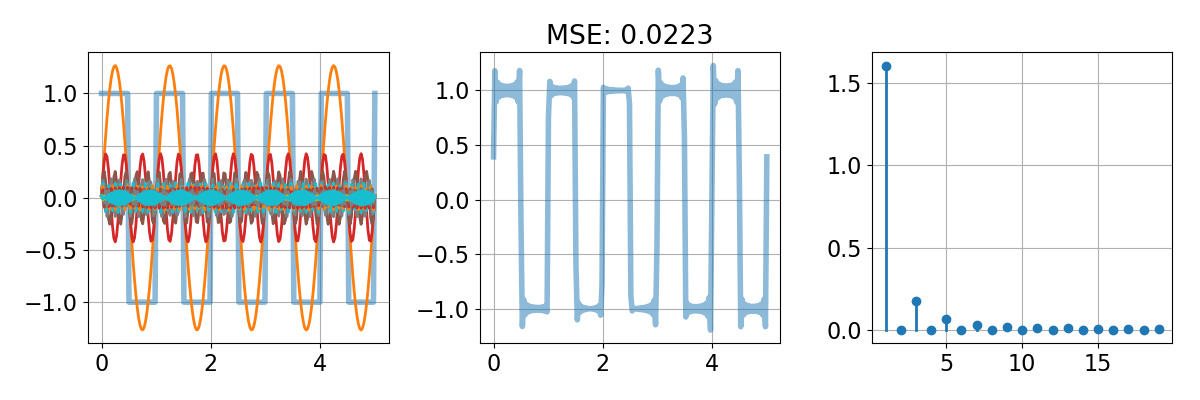

interactive(children=(IntSlider(value=1, description='N Components', layout=Layout(height='20px', width='600px…

In [6]:
# Ejemplo: Serie de Fourier de un pulso cuadrado
from scipy.signal import square, sawtooth
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
x = np.linspace(0.0, 5.0, num=200); y = square(2 * np.pi * 1 * x)

def fourier_series_square(n=1):
    tmp = 0.0;
    for axis in ax:
        axis.cla()
    ax[0].plot(x, y, linewidth=4, alpha=0.5)
    for n in range(n):
        a = 2*np.mean(y*np.cos(2.0*np.pi*(n+1)*x))
        b = 2*np.mean(y*np.sin(2.0*np.pi*(n+1)*x))
        component = a*np.cos(2.0*np.pi*(n+1)*x) + b*np.sin(2.0*np.pi*(n+1)*x)
        tmp += component; ax[0].plot(x, component); 
        ax[2].stem([n+1], [a**2 + b**2])
    ax[1].plot(x, np.mean(y)+tmp, linewidth=4, alpha=0.5); plt.tight_layout(); 
    ax[1].set_title("MSE: %0.4f" % np.mean((y-np.mean(y) - tmp)**2));
interactive_plot = interact(fourier_series_square, 
                            n=IntSlider(min=1, max=20, description="N Components", layout=slider_layout));

### Visualización de componentes de Fourier en coordenadas polares

La serie de Fourier también se puede expresar en coordenadas polares como

$$
g(t) = c_0 + \sum_{k=1}^{M} c_k \cos(2\pi f_0 k t + \phi_k) 
$$
en términos de la magnitud y fase definidos como
$$
c_k = \sqrt{a_k^2 + b_k^2}  \qquad \phi_k = \tan^{-1} \left( \frac{-b_k}{a_k} \right)
$$

Entendido esto observe la siguiente visualización interactiva de serie de Fourier

https://bl.ocks.org/jinroh/7524988



### Número complejo en forma polar

El número de euler
$$
\exp \left(-j 2\pi f t \right) = \cos(2\pi f t) - j \sin(2 \pi f t),
$$
donde $j = \sqrt{-1}$. Un número complejo cualquiera se puede escribir como
$$
z = a - j b = |z| \exp \left(-j \phi \right),
$$
con
$$
|z| = \sqrt{a^2 + b^2} \qquad \phi = \tan^{-1}(b/a)
$$


<IPython.core.display.Javascript object>


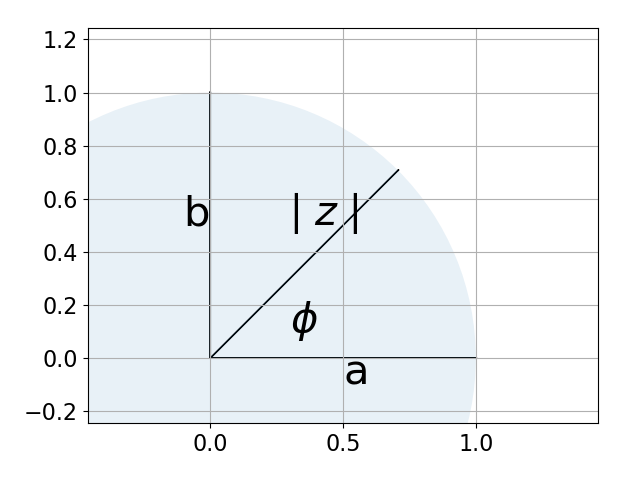

In [7]:
from matplotlib import patches
fig = plt.figure(); ax = fig.add_subplot(1,1,1);
ax.arrow(0, 0, np.sqrt(0.5), np.sqrt(0.5));
plt.text(x=-0.1, y=0.5, s="b", fontsize=30); plt.text(x=0.5, y=-.1, s="a", fontsize=30);
plt.text(x=0.25, y=0.5, s="$\mid z \mid$", fontsize=30); plt.text(x=0.3, y=0.1, s="$\phi$", fontsize=30);
ax.arrow(0, 0, 1, 0); ax.arrow(0, 0, 0, 1); p = patches.Circle(xy=(0, 0), radius=1, alpha=0.1);
ax.add_artist(p); plt.axis('equal'); plt.xlim([-0.5 , 1.5]); plt.ylim([-0.5 , 1.5]);

## Transformada de Fourier

El análisis de serie de Fourier se puede extender al caso de una señal en un intervalo finito de tiempo. En este límite se encuentra la transformada de Fourier para una base **trigonométrica compleja**

\begin{align}
G(f) &= \mathcal{F}[g(t)] = \int_{-\infty}^{\infty} g(t) \exp(-j2\pi f t) \,dt \\
&= \int_{-\infty}^{\infty} g(t) \cos(2\pi f t) \,dt - j \int_{-\infty}^{\infty} g(t) \sin(2\pi f t) \,dt
\end{align}

**Propiedad:** La transformada de Fourier es reversible
\begin{align}
g(t) &= \mathcal{F}^{-1}[G(f)] =\int_{-\infty}^{\infty} G(f) \exp(j2\pi f t) \,df \\
&= \int_{-\infty}^{\infty} G(f) \cos(2\pi f t) \,df + j \int_{-\infty}^{\infty} G(f) \sin(2\pi f t) \,df
\end{align}

Es usual descomponer la transformada de Fourier en el espectro de amplitud y el espectro de fase

$$
G(f) = |G(f)| \exp({j\varphi(f)})
$$

**Propiedad:** La convolución en el tiempo se convierte en multiplicación en frecuencia y viceverza (Lathi & Ding, 2009, Sec 3.3.6)

$$
\mathcal{F}[g(t)*y(t)] = \mathcal{F}[g(t)] \mathcal{F}[y(t)] = G(f) Y(f)
$$

**Propiedad:** La transformada de Fourier es un operador lineal

\begin{align}
\mathcal{F}[a g_1(t) + b g_2(t) ] &= a\mathcal{F}[g_1(t)] + b \mathcal{F}[g_2(t) ] \\ &= a G_1(f) + b G_2(f)
\end{align}

**Propiedad:** Dualidad de la transformada de Fourier, si conocemos $g(t)$ y su transformada $G(f)$, entonces la transformada de $G$

$$
\mathcal{F}[G(t) ] = g(-f)
$$

## Transformada de Fourier

**Teorema de Parseval/Teorema de energia de Rayleigh**: 

$$
\int_{-\infty}^{\infty} |g(t)|^2 \,dt = \int_{-\infty}^{\infty} |G(f)|^2 \,df
$$

- La energía de una señal se preserva. La transformada de Fourier no pierde información. (Lathi & Ding, 2009, Sec 3.7.1)

**Teorema de Wiener-Khinchin**:

$$
|G(f)|^2 = \int_{-\infty}^{\infty} \rho_{gg}(\tau) \exp({-j2\pi f \tau }) \,dt = \mathcal{F}[\rho_{gg}(\tau)]
$$
$$
\rho_{gg}(\tau) = \int_{-\infty}^{\infty} |G(f)|^2 \exp({j2\pi\tau f}) \,df  = \mathcal{F}^{-1}[|G(f)|^2]
$$

- La transformada de Fourier de la autocorrelación es la *densidad espectral de potencia* y viceverza (Lathi & Ding, 2009, 3.7.5). 
- La densidad espectral es la potencia asignada a cada frecuencia de la señal


### Transformada de Fourier de una delta de Dirac (impulso en el tiempo)
La definición de la delta de Dirac 
\begin{equation}
g(t) = \delta(t-\widehat a) = 0  ~~ \text{para}  ~~ t \neq \widehat a  ~~ \text{con} ~~ \int_{-\infty}^{\infty} \delta(t) \,dt = 1
\end{equation}
La delta cumple las siguiente propiedad (Sifting)

$$ 
\int_{-\infty}^{\infty} \delta(t-\widehat a)  g(t) \,dt = g(\widehat a)
$$

Luego su transformada de Fourier
\begin{align}
G(f) = \mathcal{F} [g(t)] &= \int \delta(t-\widehat a) \exp({-j 2 \pi f t}) \,dt \\
&= \exp(-j 2 \pi f \widehat a)
\end{align}

Además notar que para $\widehat a = 0$

$$
\mathcal{F} [\delta(t)] = 1
$$

Finalmente consideremos la transformada inversa
\begin{align}
\delta(t - \widehat a) = \mathcal{F}^{-1} [G(f)] &= \int \exp(-j 2 \pi f \widehat a) \exp(j 2 \pi f t) \,df \\ &= \int  \exp \left(j 2 \pi f (t-\widehat a) \right)  \,df 
\end{align}


### Transformada de Fourier de una exponencial compleja
Sea una exponencial compleja

$$
g(t) = \exp (j 2 \pi \widehat f t)
$$

Por lo visto antes su transformada de Fourier

\begin{align}
G(f) = \mathcal{F} [g(t)] &= \int \exp(j 2 \pi \widehat f t) \exp({-j 2 \pi f t}) \,dt \\
&= \int \exp \left(-j 2 \pi ( f - \widehat f) t\right) \,dt \\ &= \delta(f - \widehat f)
\end{align}

La transformada de Fourier de la exponencial compleja es un impulso desplazado en frecuencia!

<IPython.core.display.Javascript object>


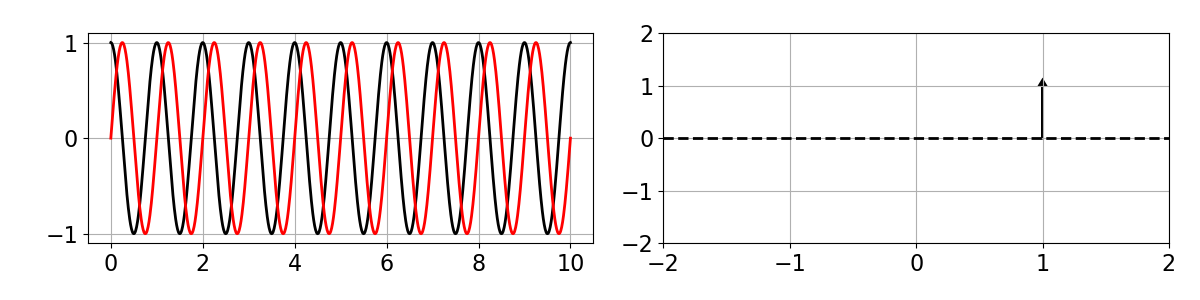

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
t = np.linspace(0,10, num=1000); 
y = np.cos(2.0*np.pi*t); ax[0].plot(t, y, c='k');
y = np.sin(2.0*np.pi*t); ax[0].plot(t, y, c='r');
ax[1].arrow(1, 0, 0, 1, head_width=0.05, head_length=0.1, linewidth=2,fc='k', ec='k')
ax[1].plot([-2, 2], [0, 0], linestyle='--', linewidth=2, c='k')
ax[1].set_xlim([-2 , 2]); ax[1].set_ylim([-2 , 2]);

### Transformada de Fourier de un coseno
Sea 

$$
g(t) = \cos( 2 \pi \widehat f t) = \frac{1}{2} \left( \exp(2 \pi \widehat f t) + \exp(-2 \pi \widehat f t) \right)
$$

Por lo visto antes su transformada de Fourier
\begin{align}
G(f) = \mathcal{F} [g(t)] &= \frac{1}{2} \int \left( \exp(2 \pi \widehat f t) + \exp(-2 \pi \widehat f t) \right) \exp(-j 2 \pi f t) \,dt \\
&= \frac{1}{2} \int \exp \left(-j 2 \pi ( f - \widehat f) t\right ) \,dt  + \frac{1}{2} \int \exp \left(-j 2 \pi (  f +  \widehat f) t \right) \,dt \\
&= \frac{1}{2}  \left( \delta(f - \widehat f) + \delta( f + \widehat f) \right)
\end{align}
La transformada de Fourier de la exponencial compleja es un impulso desplazado en frecuencia!

<IPython.core.display.Javascript object>


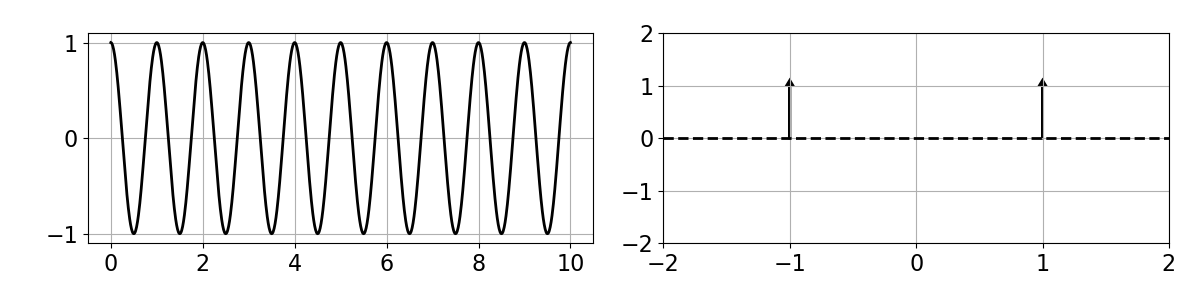

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
t = np.linspace(0,10, num=1000); 
y = np.cos(2.0*np.pi*t); ax[0].plot(t, y, c='k');
ax[1].arrow(1, 0, 0, 1, head_width=0.05, head_length=0.1, linewidth=2,fc='k', ec='k')
ax[1].arrow(-1, 0, 0, 1, head_width=0.05, head_length=0.1, linewidth=2,fc='k', ec='k')
ax[1].plot([-2, 2], [0, 0], linestyle='--', linewidth=2, c='k')
ax[1].set_xlim([-2 , 2]); ax[1].set_ylim([-2 , 2]);

### Transformada de Fourier de funciones comunes  
- Gaussiana en el tiempo: Gaussiana en frecuencia
- Rectangulo en el tiempo: Sinc en frecuencia
- Sinusoide en el tiempo: Impulso en frecuencia 

Referencias
- (Lathi & Ding, 2009, Sec 3.2)
- http://www.thefouriertransform.com/pairs/fourier.php

## Transformada de Fourier discreta (DFT)

Para computar la transformada de Fourier sobre señales muestreadas (discretas) usamos la DFT. El resultado es una transformada de Fourier definida en un conjunto discreto de frecuencias

Sea una señal discreta $g[n]$ con  $n \in [0, N-1]$ y tiempo de muestreo $T_s$, es decir $t[n] = n T_s$. La DFT se define como

$$
G[k] = \sum_{n=0}^{N-1} g[n]  \exp \left(-j2\pi f[k] t[n] \right) = \sum_{n=0}^{N-1} g[n] \exp \left( -j 2\pi \frac{k n}{N} \right) ,
$$

donde $f[k] = k f_0 ~~ \forall k \in [-\frac{(N-1)}{2}, \frac{(N-1)}{2}]$, $f_0 = \frac{F_s}{N}$, $F_s = \frac{1}{T_s}$ y $t[n] = n T_s$

La DFT es también invertible

$$
g[n] = \frac{1}{N} \sum_{k=0}^{N-1} G[k]  \exp \left( j2\pi \frac{k n}{N} \right)
$$

Notar que N puntos en el tiempo se mapean con N frecuencias independientes

## Transformada de Fourier discreta (DFT)

Interpretación matricial de la DFT
$$
G[k] = \sum_{n=0}^{N-1} g[n] \exp \left(-j2\pi f[k] t[n]\right) = \sum_{n=0}^{N-1} g[n] \exp \left(-j2\pi \frac{k n}{N}\right) 
$$

$$
f = -\frac{F_s}{2}, \ldots,  0, ~\frac{F_s}{N}, ~2 \frac{F_s}{N} , ~3 \frac{F_s}{N}, \ldots, ~\frac{F_s}{2} 
\qquad 
t = 0, ~ T_s, ~2 T_s , ~3 T_s, \ldots, ~(N-1) T_s 
$$

\begin{align}
\begin{bmatrix}
    \exp \left(-j2\pi f[-\frac{(N-1)}{2}] t[0] \right) & \exp \left(-j2\pi f[-\frac{(N-1)}{2}] t[1]\right) & \dots & \exp \left(-j2\pi f[-\frac{(N-1)}{2}] t[N-1]\right) \\
    \vdots & \vdots & \ddots & \vdots\\
    \exp \left(-j2\pi f[0] t[0]\right) & \exp \left(-j2\pi f[0] t[1]\right) & \dots & \exp \left(-j2\pi f[0] t[N-1]\right) \\
    \vdots & \vdots & \ddots & \vdots\\
    \exp \left(-j2\pi f[\frac{(N-1)}{2}] t[0]\right) & \exp \left(-j2\pi f[\frac{(N-1)}{2}] t[1]\right) & \dots & \exp \left(-j2\pi f[\frac{(N-1)}{2}] t[N-1]\right) \\
\end{bmatrix}
\begin{bmatrix}
    g[0] \\
    g[1] \\
    g[2] \\
    \vdots \\
    g[N-1] \\
\end{bmatrix}
&=
\begin{bmatrix}
    G[-\frac{(N-1)}{2}] \\
    \vdots \\
    G[0] \\
    \vdots \\
    G[\frac{(N-1)}{2}] \\
\end{bmatrix} \\
D_{ft} g &= G
\end{align}

- Multiplicación entre una matriz de NxN y un vector de Nx1
- N sumas de N multiplicaciones, complejidad cuadrática

### Ejemplo: Espectro con DFT matricial


<IPython.core.display.Javascript object>


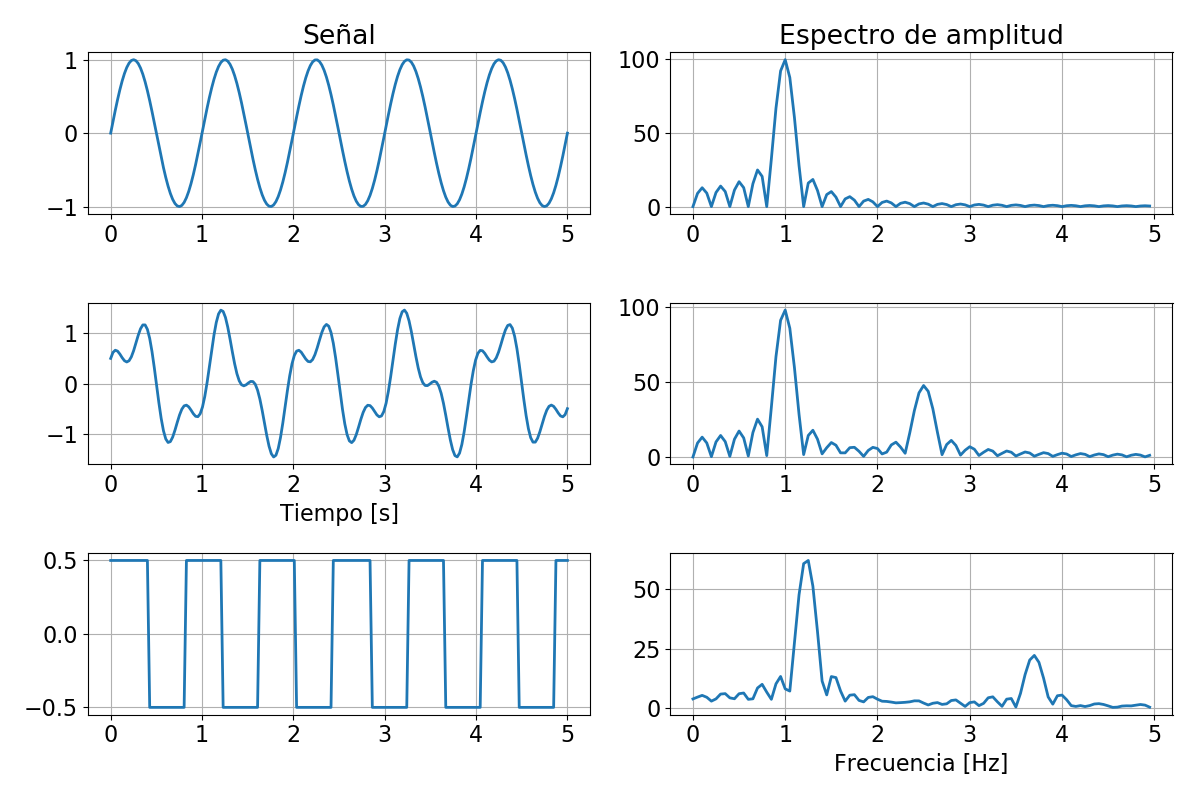

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8), tight_layout=True)
x = np.linspace(0.0, 5.0, num=200); 
f = np.arange(0.0, 0.5*200/20.0, step=1.0/20.0)
tf = 2.0*np.pi*x[:, np.newaxis]*f[:,np.newaxis].T
def espectro_matricial(y):
    Yreal = np.dot(y, np.cos(tf)); Yimag = -np.dot(y, np.sin(tf));
    return np.sqrt(Yreal**2 + Yimag**2)
y = np.sin(2.0*np.pi*1.0*x)
ax[0, 0].plot(x, y, linewidth=2); ax[0, 0].set_title('Señal')
ax[0, 1].plot(f, espectro_matricial(y)); ax[0, 1].set_title('Espectro de amplitud')
# ax.plot(f, np.arctan2(-Yimag, Yreal)); ax.set_title('Espectro de fase')
y = np.sin(2.0*np.pi*1.0*x) + 0.5*np.cos(2.0*np.pi*2.5*x)
ax[1,0].plot(x, y, linewidth=2); ax[1,1].plot(f, espectro_matricial(y)); 
y = 0.5 + 0.5*np.sin(2.0*np.pi*1.231412431*x)//1.1
ax[2,0].plot(x, y, linewidth=2); ax[1,0].set_xlabel("Tiempo [s]");
ax[2,1].plot(f, espectro_matricial(y)); ax[2,1].set_xlabel("Frecuencia [Hz]");


### Autocorrelación y espectro


<IPython.core.display.Javascript object>


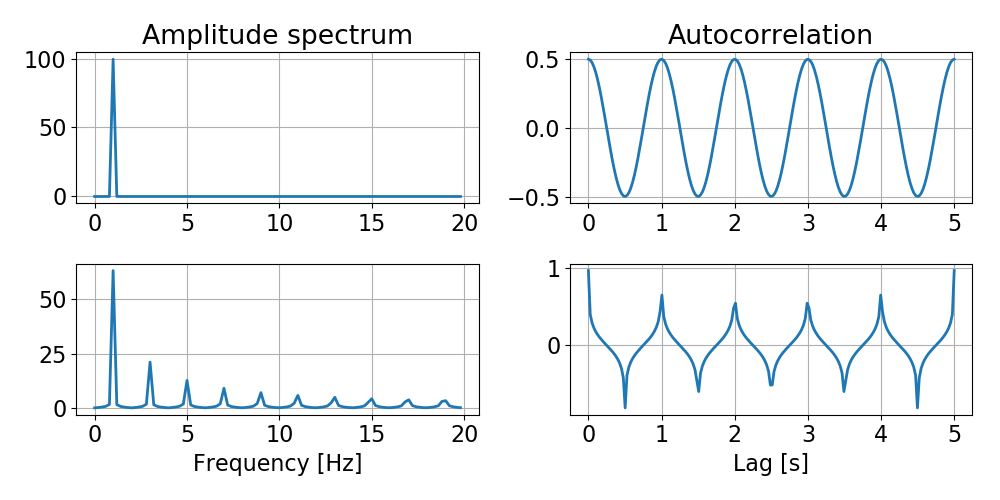

In [3]:
x = np.linspace(0.0, 5.0, num=200)
y = np.sin(2.0*np.pi*1.0*x)
fig = plt.figure(figsize=(10, 5))
f = np.arange(0.0, 0.5*200/5.0, step=1.0/5.0)
tf = 2.0*np.pi*x[:, np.newaxis]*f[:,np.newaxis].T
Yreal = np.dot(y, np.cos(tf)); Yimag = -np.dot(y, np.sin(tf));
ax = fig.add_subplot(2, 2, 1); ax.plot(f, np.sqrt(Yreal**2 + Yimag**2)); ax.set_title('Amplitude spectrum')
autocorr = np.dot(np.sqrt(Yreal**2 + Yimag**2), np.cos(tf).T)/len(x)
ax = fig.add_subplot(2, 2, 2); ax.plot(x, autocorr, linewidth=2);  ax.set_title('Autocorrelation'); 
y = 0.5 + 0.5*np.sin(2.0*np.pi*1.0*x)//1.1
Yreal = np.dot(y, np.cos(tf)); Yimag = -np.dot(y, np.sin(tf));
ax = fig.add_subplot(2, 2, 3); ax.plot(f, np.sqrt(Yreal**2 + Yimag**2)); ax.set_xlabel("Frequency [Hz]");
autocorr = np.dot(np.sqrt(Yreal**2 + Yimag**2), np.cos(tf).T)/len(x)
ax = fig.add_subplot(2, 2, 4); ax.plot(x, autocorr, linewidth=2); ax.set_xlabel("Lag [s]");
plt.tight_layout(pad=0.1);

### Ejemplo: DFT de un pulso cuadrádo

<IPython.core.display.Javascript object>


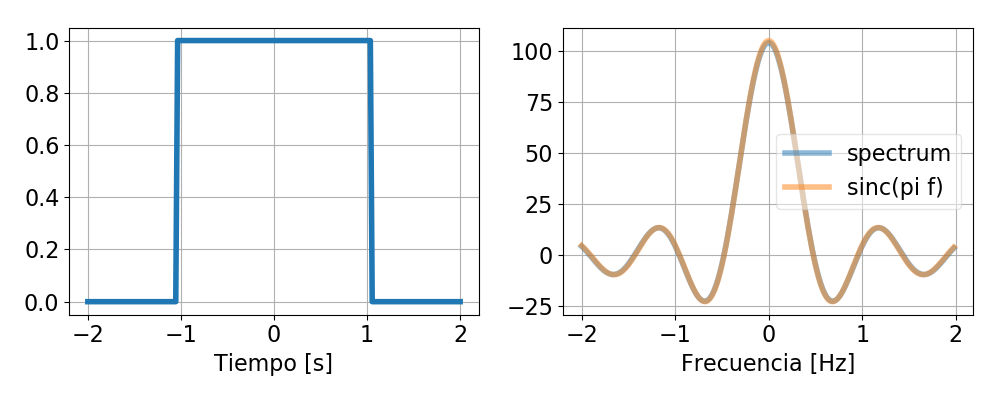

interactive(children=(FloatSlider(value=0.1, description='Pulse width', layout=Layout(height='20px', width='60…

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
def update(d=5.0):
    x = np.linspace(-2.0, 2.0, num=200); y = np.zeros(shape=x.shape); y[(x > -0.5*d) & (0.5*d>x)] = 1;
    ax[0].cla(); ax[1].cla();
    ax[0].plot(x, y, linewidth=4); ax[0].set_xlabel("Tiempo [s]");
    f = np.arange(-2, 2, step=0.02)
    tf = 2.0*np.pi*x[:, np.newaxis]*f[:,np.newaxis].T
    Yreal = np.dot(y, np.cos(tf)); # Yimag is zero because y is symmetric
    ax[1].plot(f, Yreal, linewidth=4, alpha=0.5, label='spectrum'); ax[1].set_xlabel("Frecuencia [Hz]");
    ax[1].plot(f, (200/4)*d*np.sin(np.pi*f*d)/(np.pi*f*d), linewidth=4, alpha=0.5, label='sinc(pi f)'); 
    plt.legend(); 
interactive_plot = interact(update, d=FloatSlider(min=0.1, max=3.9, description="Pulse width", 
                                                  layout=slider_layout));

## Efecto del muestreo en el espectro 

- Podemos interpretar que una señal discreta se obtiene de multiplicar una señal continua por un tren de pulsos (filtro peineta)
- Esto corresponde a convolucionar el espectro por la transformada del filtro
- El espectro de una señal discreta en el tiempo es periódico!
- **Teorema de Nyquist-Shannon**: Una señal muestreada con frecuencia $F_s = 1/\Delta t$ puede reconstruirse sin pérdida de información ssi no contiene frecuencias mayores que $F_s/2$ (Nyquist frequency)
- El traslape del espectro cuando $F_s$ es muy bajo caso se conoce como **aliasing**

<table><tr><td><img src="images/sampling1.png" > </td><td><img src="images/sampling2.png" ></td></tr></table>
-  Figura tomada de www.astroml.org

<IPython.core.display.Javascript object>


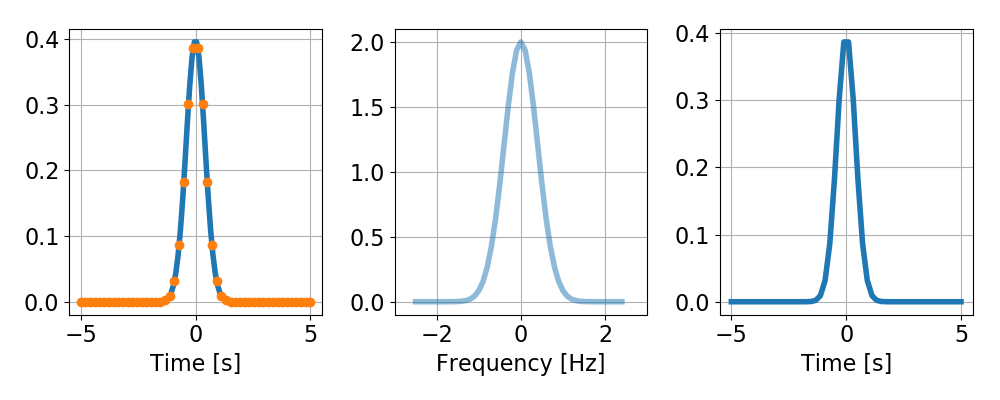

interactive(children=(SelectionSlider(continuous_update=False, description='num', layout=Layout(height='20px',…

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
x_true = np.linspace(-5, 5, num=100); 
y_true =  np.exp(-3*(x_true)**2)/np.sqrt(2.0*np.pi)
from scipy import fftpack as fft

def update(num=50):
    [ax_.cla() for ax_ in ax]
    x = np.linspace(-5, 5, num=num); y =  np.exp(-3*(x)**2)/np.sqrt(2.0*np.pi)
    ax[0].plot(x_true, y_true, '-', linewidth=4); 
    ax[0].set_xlabel("Time [s]"); ax[0].plot(x, y, 'o', linewidth=4); 
    S = fft.fft(y, n=len(x))
    f = fft.fftshift(fft.fftfreq(n=len(x), d=10/num))
    ax[1].plot(f, fft.fftshift(np.abs(S)), linewidth=4, alpha=0.5);
    ax[1].set_xlabel("Frequency [Hz]"); ax[1].set_xlim([-3, 3]); 
    y_hat = fft.ifft(S)
    ax[2].plot(x, np.real(y_hat), linewidth=4)
    ax[2].set_xlabel("Time [s]"); 
interactive_plot = interact(update, num=SelectionSlider_nice(options=[50, 40, 30, 20, 10]))

## Efecto del muestreo en el espectro 

- Una señal muestreada a frecuencia $F_s [Hz]$ y de largo $T [s]$ tiene $N= F_s T$ puntos. 
- Podemos interpretar que la señal truncada en $[0, T]$ es en realidad una señal continua multiplicada por un rectangulo de ancho $T$
- Esto equivale a convolucionar el espectro con un $T\text{sinc}(\pi f T)$
- Se produce un artefacto denominado "spectral leakage", el cual se puede eliminar usando "enventanado"

Ref: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.kaiser.html

<IPython.core.display.Javascript object>


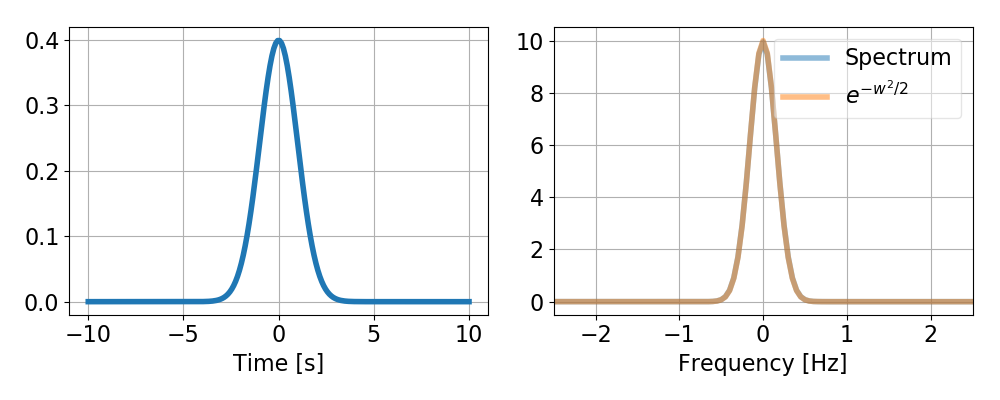

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='d', layout=Layout(height='…

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

def update(d=5.0):
    [ax_.cla() for ax_ in ax]
    x = np.linspace(-d, d, num=200); y =  np.exp(-0.5*(x)**2)/np.sqrt(2.0*np.pi)
    ax[0].plot(x, y, linewidth=4); ax[0].set_xlabel("Time [s]");
    S = fft.fftshift(fft.fft(y))
    f = fft.fftshift(fft.fftfreq(n=len(x), d=d/100))
    ax[1].plot(f, np.abs(S), linewidth=4, alpha=0.5, label='Spectrum'); 
    ax[1].plot(f, (0.5*len(x)/d)*np.exp(-0.5*(2*np.pi*f)**2), 
               linewidth=4, alpha=0.5, label='$e^{-w^2/2}$'); 
    ax[1].set_xlabel("Frequency [Hz]"); plt.legend(); plt.xlim([-2.5, 2.5]); 
interactive_plot = interact(update, d=FloatSlider_nice(min=0.1, max=10.0, value=10.0));

<IPython.core.display.Javascript object>


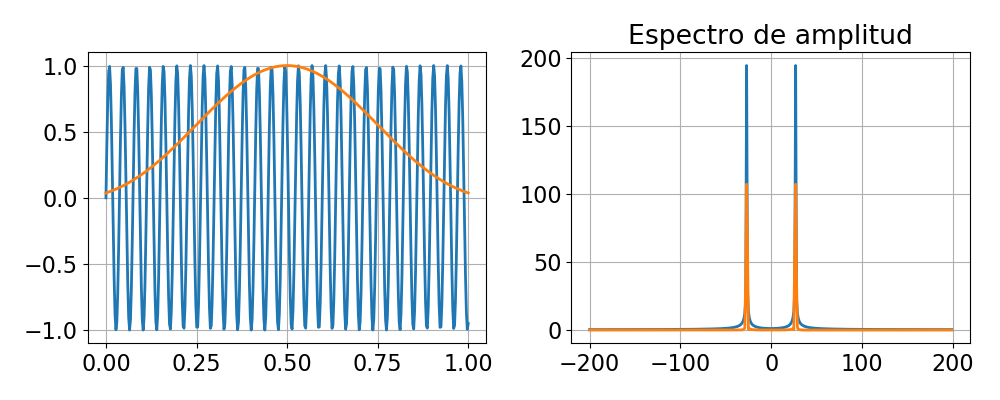

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='beta', layout=Layout(height…

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4)); 

def kaiser_windowing(beta=0.5):
    [ax_.cla() for ax_ in ax]
    x = np.linspace(0.0, 1.0, num=400)
    y = np.sin(2.0*np.pi*26.8*x)
    ax[0].plot(x, y, linewidth=2); 
    S = fft.fftshift(fft.fft(y))
    f = fft.fftshift(fft.fftfreq(n=len(x), d=1/len(x)))
    ax[1].plot(f, np.abs(S)); 
    ax[0].plot(x, np.kaiser(len(x), beta=beta)); ywin = y*np.kaiser(len(x), beta=beta);
    S = fft.fftshift(fft.fft(ywin))
    ax[1].plot(f, np.abs(S)); ax[1].set_title('Espectro de amplitud'); 
interactive_plot = interact( kaiser_windowing, 
                            beta=FloatSlider_nice(min=0, max=10.0, value=5.0))

## Transformada rápida de Fourier

La computación de la DFT tiene complejidad $\mathcal{O}(N^2)$. Existe una aproximación numérica con complejidad $\mathcal{O}(N\log N)$: la Fast Fourier Transform (FFT). 

El algoritmo de Cooley-Tukey obtiene una FFT recursiva que explota las simentrías en la DFT.  

\begin{align}
G[k] &=  \sum_{n=0}^{N-1} g_n \exp \left(-j2\pi \frac{k n}{N} \right) \\
&= \sum_{n=0}^{N/2-1} g_{2n} \exp \left(-j2\pi \frac{k 2n}{N}  \right) + \sum_{n=0}^{N/2-1} g_{2n+1} \exp \left(-j2\pi \frac{k (2n+1)}{N} \right) \\
&= \sum_{n=0}^{N/2-1} g_{2n} \exp \left(-j2\pi \frac{k n}{N/2} \right) + \exp \left(-j2\pi  \frac{k}{N} \right) \sum_{k=0}^{N/2-1} g_{2n+1} \exp \left(-j2\pi \frac{k n}{N/2} \right) \\ 
&= G_E[k] + \exp \left( -j2\pi \frac{k}{N} \right) G_O[k] ~~ \forall k \in [0,N/2] 
\end{align} 

Notar que se calculan dos "medias" DFT

## Transformada rápida de Fourier

Notemos que 

$$
 \exp \left(-j2\pi \frac{k+ N/2}{N}\right) = \exp \left(-j2\pi \frac{k}{N} \right) \exp \left(-j\pi\right) =  - \exp \left(-j2\pi \frac{k}{N} \right)
$$

Además por periodicidad/simetría de la DFT
\begin{align}
G_E[k + N/2] &=  \sum_{n=0}^{N/2-1} g_{2n} \exp \left( -j2\pi \frac{(k+ N/2)n}{N/2} \right) \\
&= \sum_{n=0}^{N/2-1} g_{2n} \exp \left(-j2\pi \frac{k n}{N/2} \right)  \exp \left(-j2\pi n \right) = G_E[k]
\end{align}

Finalmente
\begin{align}
G[k] &=  G_E[k] + \exp \left( -j2\pi \frac{k}{N} \right) G_O[k] ~~~ \forall k \in [0,N/2] \\
G[k + N/2] &=  G_E[k + N/2] - \exp \left( -j2\pi \frac{k}{N} \right) G_O[k + N/2] \\
 &=  G_E[k] - \exp \left( -j2\pi \frac{k}{N} \right) G_O[k] \\
\end{align}

Usamos los mismos cálculos para dos coeficientes frecuenciales $k$ y $k + N/2$

Podemos continuar dividiendo y ahorrando computos hasta llegar a $N\log N$ productos
<img src="images/FFT.gif" width="600">

## Transformada rápida de Fourier

- Python: numpy.fft y scipy.fftpack
- C: The Fastest Fourier Transform in the WEst (FFTW)
- Para FFTW existen python wrappers

In [9]:
from scipy import fftpack as fft
fft?

In [8]:
x = np.linspace(-10.0, 10.0, num=1000); 
y = np.sin(2.0*np.pi*2.0*x) 
freq = np.arange(-25, 25, step=1.0/20);
xf = 2.0*np.pi*x[:, np.newaxis]*freq[:, np.newaxis].T
%timeit -n 10 Yreal = np.dot(y, np.cos(xf)); Yimag = -np.dot(y, np.sin(xf))
%timeit -n 10 S = fft.fftshift(fft.fft(y)) 

46.7 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
48.8 µs ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<img src="images/fftpack_scipy.png" width="600">

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html#scipy.fftpack.fft">docs.scipy.org</a>